In [1]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_features=4,
                           n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)
clf = BaggingClassifier(estimator=SVC(),
                        n_estimators=10, random_state=0).fit(X, y)
clf.predict([[0, 0, 0, 0]])

array([1])

In [11]:
x1=[1,1,1,0,1,1]
y1=[1,1,1,0,1,0]

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(x1,y1)

0.8333333333333334

In [17]:
x3=[[1,2,3,4]]
type(x3)

list

In [18]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [19]:

df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,0.218939,-1.063284,-0.318454,-0.439471,-2.028857,1
1,-2.929523,-4.360311,-3.020322,-2.219504,-1.819831,1
2,-2.618583,-0.616745,-3.007855,-1.637216,-0.204791,1
3,-2.066746,-0.132180,-1.023782,-1.784312,1.399122,1
4,-0.039189,-0.818180,-0.211853,-1.283443,-0.993446,1


In [20]:
df=pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/19_Bagging/Exercise/heart.csv')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [24]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [25]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [26]:
# No Missing values 
# split numeric and categorical columns
num_features=[col for col in df.columns if df[col].dtype!='O']
num_df = df[num_features]
num_df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,140,289,0,172,0.0,0
1,49,160,180,0,156,1.0,1
2,37,130,283,0,98,0.0,0
3,48,138,214,0,108,1.5,1
4,54,150,195,0,122,0.0,0


In [28]:
import seaborn as sns

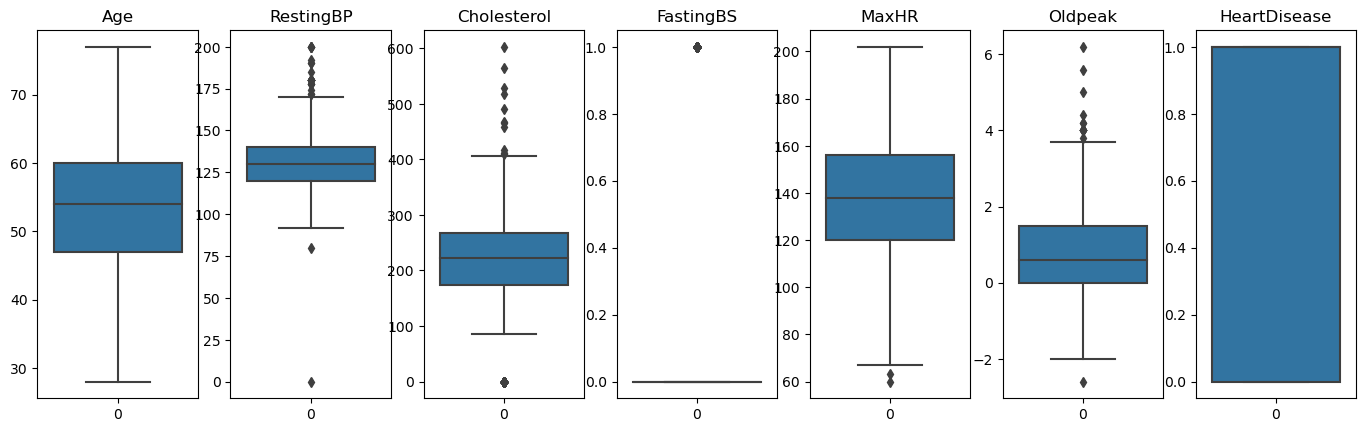

In [29]:
plt.figure(figsize=(22,22))
for i,col in enumerate(num_df.columns):
    plt.subplot(4,9,i+1)
    sns.boxplot(num_df[col])
    plt.title(num_df.columns[i])

In [31]:
num_df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
Cholesterol,MaxHR,Oldpeak

In [32]:
df1 = df.copy()
def remove_outliers_IQR(col):
    # Finding the IQR
    percentile25 = df1[col].quantile(0.25)
    percentile75 = df1[col].quantile(0.75)
    print("percentile25",percentile25)
    print("percentile75",percentile75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    print("Upper limit",upper_limit)
    print("Lower limit",lower_limit)
    df1[col] = np.where(df1[col]>upper_limit, upper_limit, np.where(df1[col]<lower_limit,lower_limit,df1[col]))
    return df1[df1[col] > upper_limit]

In [33]:
remove_outliers_IQR('RestingBP')

percentile25 120.0
percentile75 140.0
Upper limit 170.0
Lower limit 90.0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [34]:
def create_comparison_plot(df,df1,column):
    # Comparing
    plt.figure(figsize=(16,8))
    plt.subplot(2,2,1)
    sns.distplot(df[column])

    plt.subplot(2,2,2)
    sns.boxplot(df[column])

    plt.subplot(2,2,3)
    sns.distplot(df1[column])

    plt.subplot(2,2,4)
    sns.boxplot(df1[column])

    plt.show()

C:\Users\mmanoj\AppData\Local\Temp\ipykernel_14264\3382028804.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
C:\Users\mmanoj\AppData\Local\Temp\ipykernel_14264\3382028804.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[column])


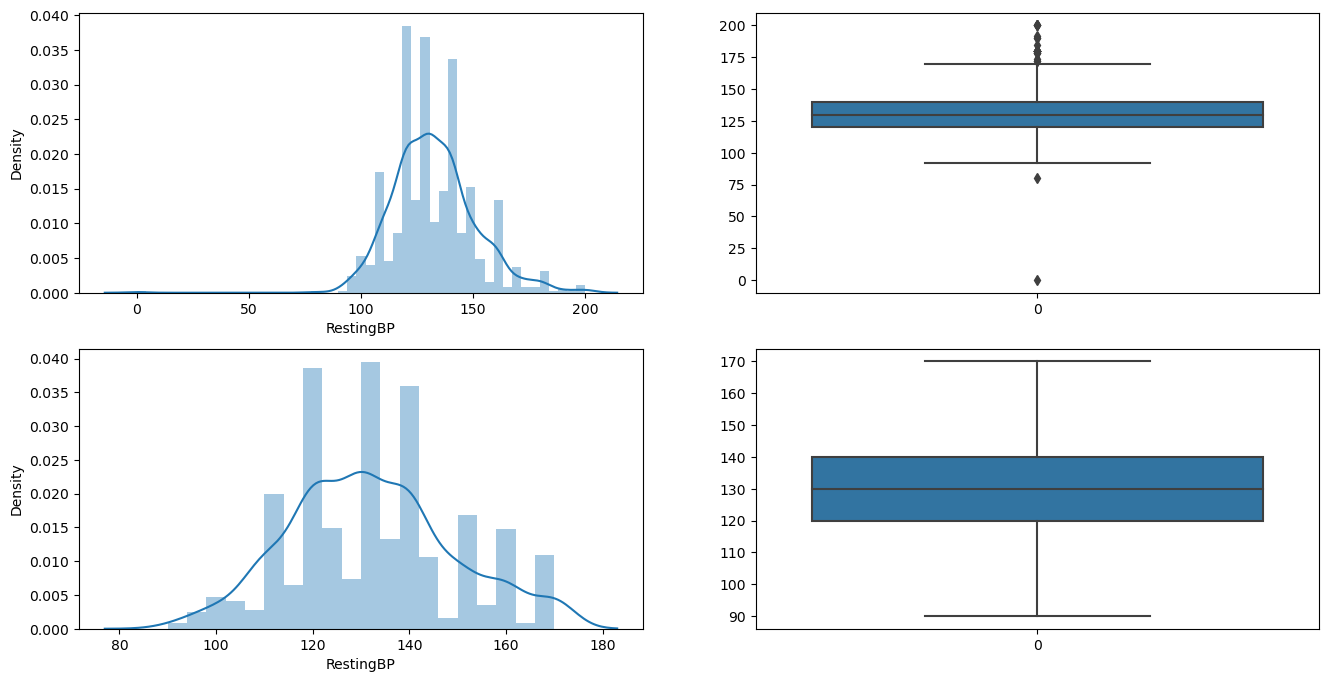

In [35]:
create_comparison_plot(df,df1,'RestingBP')

In [ ]:
Cholesterol,MaxHR,Oldpeak

In [36]:
remove_outliers_IQR("Cholesterol")

percentile25 173.25
percentile75 267.0
Upper limit 407.625
Lower limit 32.625


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [37]:
remove_outliers_IQR('MaxHR')

percentile25 120.0
percentile75 156.0
Upper limit 210.0
Lower limit 66.0


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [38]:
remove_outliers_IQR('Oldpeak')

percentile25 0.0
percentile75 1.5
Upper limit 3.75
Lower limit -2.25


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [43]:
# split numeric and categorical columns
num_features1=[col for col in df1.columns if df1[col].dtype!='O']
num_df1 = df1[num_features]
num_df1.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,140.0,289.0,0,172.0,0.0,0
1,49,160.0,180.0,0,156.0,1.0,1
2,37,130.0,283.0,0,98.0,0.0,0
3,48,138.0,214.0,0,108.0,1.5,1
4,54,150.0,195.0,0,122.0,0.0,0


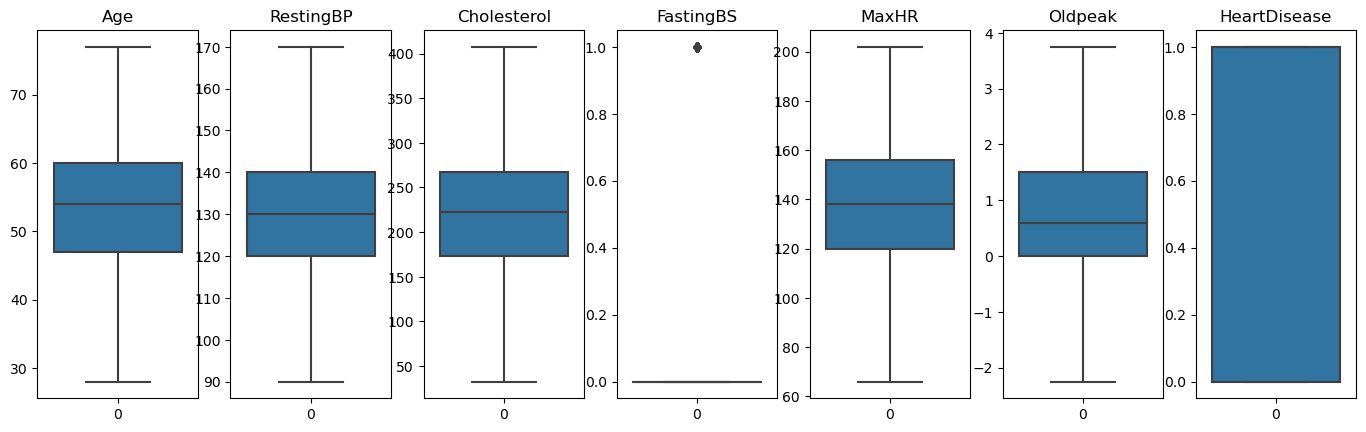

In [44]:
plt.figure(figsize=(22,22))
for i,col in enumerate(num_df1.columns):
    plt.subplot(4,9,i+1)
    sns.boxplot(num_df1[col])
    plt.title(num_df1.columns[i])

In [46]:
cat_features=[col for col in df1.columns if df1[col].dtype =='O']
cat_df = df1[cat_features]
cat_df.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up


In [49]:
df1['Sex']=df1['Sex'].map({'M':1,'F':2})

In [50]:
df['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [51]:
df['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [52]:
df['ExerciseAngina'].unique()

array(['N', 'Y'], dtype=object)

In [53]:
df['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [54]:
df1=pd.get_dummies(df1,columns=['ChestPainType','RestingECG','ExerciseAngina','ST_Slope'],drop_first=True)

In [56]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   Sex                918 non-null    int64  
 2   RestingBP          918 non-null    float64
 3   Cholesterol        918 non-null    float64
 4   FastingBS          918 non-null    int64  
 5   MaxHR              918 non-null    float64
 6   Oldpeak            918 non-null    float64
 7   HeartDisease       918 non-null    int64  
 8   ChestPainType_ATA  918 non-null    uint8  
 9   ChestPainType_NAP  918 non-null    uint8  
 10  ChestPainType_TA   918 non-null    uint8  
 11  RestingECG_Normal  918 non-null    uint8  
 12  RestingECG_ST      918 non-null    uint8  
 13  ExerciseAngina_Y   918 non-null    uint8  
 14  ST_Slope_Flat      918 non-null    uint8  
 15  ST_Slope_Up        918 non-null    uint8  
dtypes: float64(4), int64(4), u

In [58]:
X=df1.drop('HeartDisease',axis=1)

In [59]:
X

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,1,140.0,289.0,0,172.0,0.0,1,0,0,1,0,0,0,1
1,49,2,160.0,180.0,0,156.0,1.0,0,1,0,1,0,0,1,0
2,37,1,130.0,283.0,0,98.0,0.0,1,0,0,0,1,0,0,1
3,48,2,138.0,214.0,0,108.0,1.5,0,0,0,1,0,1,1,0
4,54,1,150.0,195.0,0,122.0,0.0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110.0,264.0,0,132.0,1.2,0,0,1,1,0,0,1,0
914,68,1,144.0,193.0,1,141.0,3.4,0,0,0,1,0,0,1,0
915,57,1,130.0,131.0,0,115.0,1.2,0,0,0,1,0,1,1,0
916,57,2,130.0,236.0,0,174.0,0.0,1,0,0,0,0,0,1,0


In [60]:
y=df.HeartDisease

In [62]:
df1.HeartDisease.value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [61]:
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [65]:
from sklearn.model_selection import train_test_split

In [67]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=42)

In [68]:
from sklearn.preprocessing import StandardScaler

In [69]:
scaler= StandardScaler()

X_train=scaler.fit_transform(X_train)

#transforming the test data.We avoid fitting the values to prevent data leakage!
X_test=scaler.transform(X_test)

In [70]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

scores = cross_val_score(DecisionTreeClassifier(), X, y, cv=5)
scores

array([0.74456522, 0.70108696, 0.7826087 , 0.69945355, 0.67213115])

In [71]:
scores.mean()

0.7199691138037538

In [73]:
from sklearn.ensemble import BaggingClassifier

bag_model = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(), 
    n_estimators=100, 
    max_samples=0.8, 
    oob_score=True,
    random_state=0
)
bag_model.fit(X_train, y_train)
bag_model.oob_score_

c:\Users\mmanoj\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.839563862928349

In [74]:
from sklearn.ensemble import RandomForestClassifier

scores = cross_val_score(RandomForestClassifier(n_estimators=50), X, y, cv=5)
scores.mean()

0.8299833689712521

In [75]:
bag_model = BaggingClassifier(
    base_estimator=RandomForestClassifier(), 
    n_estimators=100, 
    max_samples=0.8, 
    oob_score=True,
    random_state=0
)
bag_model.fit(X_train, y_train)
bag_model.oob_score_

c:\Users\mmanoj\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.8504672897196262

In [77]:
from sklearn.svm import SVC

In [79]:
scores_svc = cross_val_score(SVC(), X, y, cv=5)
scores_svc.mean()

0.6807792824899026

In [80]:
bag_model = BaggingClassifier(
    base_estimator=SVC(), 
    n_estimators=100, 
    max_samples=0.8, 
    oob_score=True,
    random_state=0
)
bag_model.fit(X_train, y_train)
bag_model.oob_score_

c:\Users\mmanoj\AppData\Local\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.867601246105919

In [88]:
rc=RandomForestClassifier()
rc.fit(X_train,y_train)
y_pred=rc.predict(X_test)
print(accuracy_score(y_test,y_pred))
rc.score(X_train,y_train)

0.8731884057971014


1.0

In [89]:
pip install tensorflow

     -------------------------------------- 300.9/300.9 MB 2.5 MB/s eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 2.9 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 1.8 MB/s eta 0:00:00
     -------------------------------------- 413.4/413.4 kB 1.6 MB/s eta 0:00:00
     -------------------------------------- 442.0/442.0 kB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 1.6 MB/s eta 0:00:00
     -------------------------------------- 130.2/130.2 kB 1.5 MB/s eta 0:00:00
     -------------------------------------- 938.6/938.6 kB 1.6 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 24.4/24.4 MB 1.7 MB/s eta 0:00:00
     ---------------------------------------- 5.5/5.5 MB 1.6 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 1.5 MB/s eta 0:00:00
     -------------------------------------- 422.

In [90]:
pip list

Package                           VersionNote: you may need to restart the kernel to use updated packages.

--------------------------------- ---------------
absl-py                           2.0.0
alabaster                         0.7.12
anaconda-client                   1.11.2
anaconda-navigator                2.4.0
anaconda-project                  0.11.1
anyio                             3.5.0
appdirs                           1.4.4
argon2-cffi                       21.3.0
argon2-cffi-bindings              21.2.0
arrow                             1.2.3
astroid                           2.14.2
astropy                           5.1
asttokens                         2.0.5
astunparse                        1.6.3
atomicwrites                      1.4.0
attrs                             22.1.0
Automat                           20.2.0
autopep8                          1.6.0
Babel                             2.11.0
backcall                          0.2.0
backports.functools-lru-cache     1